In [4]:
import pandas as pd


In [4]:
# File path for 'Country rank data'
file_path = "C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv"

def load_and_update_data(filepath):
    # Load the dataset
    data = pd.read_csv(filepath)
    # Convert 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'])
    
    # Define the mapping of old country names to new names
    name_changes = {
        "Yugoslavia": "Croatia",
        "Czechoslovakia": "Czechia",
        "Czech Republic": "Czechia",
        "Soviet Union": "Russia",
        "Serbia and Montenegro": "Serbia",
        "East Germany": "Germany",
        "West Germany": "Germany",
        "Burma": "Myanmar"
    }
    
    # Apply the renaming to the 'country' column across all data
    data['country'] = data['country'].replace(name_changes)
    
    return data

# Call the function and print the result
updated_data = load_and_update_data(file_path)
print(updated_data.head(30))

updated_data.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv", index=False)

         date              country  rank  previousRank  totalPoints  \
0  1992-12-31              Germany     1             1         57.0   
1  1992-12-31                Italy     2             2         57.0   
2  1992-12-31               Brazil     3             3         56.0   
3  1992-12-31               Sweden     4             4         56.0   
4  1992-12-31              England     5             5         55.0   
5  1992-12-31  Republic of Ireland     6             6         54.0   
6  1992-12-31          Netherlands     7             7         54.0   
7  1992-12-31               Russia     8             8         52.0   
8  1992-12-31              Denmark     9             9         52.0   
9  1992-12-31            Argentina    10            10         51.0   
10 1992-12-31              Romania    11            11         51.0   
11 1992-12-31          Switzerland    12            12         51.0   
12 1992-12-31              Nigeria    13            13         50.0   
13 199

In [5]:
import pandas as pd

# File paths for both datasets
rank_data_path = "C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv"
new_data_path = "C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/most-popular-sport-by-country-2024.csv"

def load_and_update_data(rank_data_path, new_data_path):
    # Load the ranking data
    rank_data = pd.read_csv(rank_data_path)
    
    # Load the new dataset
    new_data = pd.read_csv(new_data_path)
    
    # Extract unique countries from both datasets
    unique_countries_rank_data = rank_data['country'].unique()
    unique_countries_new_data = new_data['country'].unique()

    # Create a mapping of country names from the new data to the rank data
    name_mapping = {new_name: rank_name for new_name in unique_countries_new_data for rank_name in unique_countries_rank_data if new_name.lower() == rank_name.lower()}

    # Check mapping and update names in the new dataset that don't exist in the rank data
    missing_from_rank = {name: "Check for alternative" for name in unique_countries_new_data if name not in name_mapping.values()}

    # Update the new data country names based on the created mapping
    new_data['country'] = new_data['country'].apply(lambda x: name_mapping.get(x, x))

    return new_data, missing_from_rank

# Call the function and display the result
updated_new_data, missing_names = load_and_update_data(rank_data_path, new_data_path)
print(updated_new_data.head())
print("Missing or unmatchable names:", missing_names)


         country mostPopularSportByCountry_babbel2021  \
0          India                              Cricket   
1          China                           Basketball   
2  United States              American Football (NFL)   
3      Indonesia                    Football (soccer)   
4       Pakistan                              Cricket   

  mostPopularSportByCountry_bleacherRep2008  \
0                                   Cricket   
1                         Football (soccer)   
2                   American Football (NFL)   
3                         Football (soccer)   
4                                   Cricket   

  mostPopularSportByCountry_mostPopularSports    population  
0                                     Cricket  1.441720e+09  
1                                  Basketball  1.425179e+09  
2                     American Football (NFL)  3.418144e+08  
3                           Football (soccer)  2.797980e+08  
4                                     Cricket  2.452098e+08  
Mi

In [5]:

import pandas as pd
rank_data = pd.read_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv")

# Creating a mapping dictionary based on the resolved names provided and applying these changes to the dataframe
name_mapping = {
    "China PR": "China",
    "USA": "United States",
    "Congo DR": "DR Congo",
    "IR Iran": "Iran",
    "Korea Republic": "South Korea",
    "Côte d'Ivoire": "Ivory Coast",
    "Korea DPR": "North Korea",
    "Chinese Taipei": "Taiwan",
    "Czechia": "Czech Republic",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Congo": "Republic of the Congo",
    "Republic of Ireland": "Ireland",
    "Cabo Verde": "Cape Verde",
    "Cape Verde Islands": "Cape Verde",
    "Brunei Darussalam": "Brunei",
    "Sao Tome e Principe": "Sao Tome and Principe",
    "São Tomé and Príncipe": "Sao Tome and Principe",
    "St Lucia": "Saint Lucia",
    "St Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "St. Vincent / Grenadines": "Saint Vincent and the Grenadines",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "St Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Kitts and Nevis": "Saint Kitts and Nevis"
}

# Applying the mapping to the 'country' column
rank_data['country'] = rank_data['country'].replace(name_mapping)
rank_data.head()
rank_data.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv", index=False)

In [9]:
# Load the datasets
country_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv')
popular_sport = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/most-popular-sport-by-country-2024.csv')  # Adjusted to a single dataset

# Create dummy columns for soccer popularity for both 2008 and 2021
popular_sport['soccer_dummy_2008'] = popular_sport['mostPopularSportByCountry_bleacherRep2008'].astype(str).apply(lambda x: 1 if 'soccer' in x.lower() else 0)
popular_sport['soccer_dummy_2021'] = popular_sport['mostPopularSportByCountry_babbel2021'].astype(str).apply(lambda x: 1 if 'soccer' in x.lower() else 0)

# Create mapping dictionaries from the sport data
dummy_mapping_2008 = popular_sport.set_index('country')['soccer_dummy_2008'].to_dict()
dummy_mapping_2021 = popular_sport.set_index('country')['soccer_dummy_2021'].to_dict()

# Ensure the 'year' column exists in the country rank data
country_data['year'] = pd.to_datetime(country_data['date']).dt.year

# Apply the mappings based on the specified years
country_data['soccer_dummy'] = country_data.apply(
    lambda x: dummy_mapping_2008.get(x['country'], 0) if x['year'] <= 2013 else dummy_mapping_2021.get(x['country'], 0), 
    axis=1
)

# Output the head of the dataframe to verify changes
print(country_data.head())
country_data.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv", index=False)

         date  country  rank  previousRank  totalPoints  previousPoints  year  \
0  1992-12-31  Germany     1             1         57.0             0.0  1992   
1  1992-12-31    Italy     2             2         57.0             0.0  1992   
2  1992-12-31   Brazil     3             3         56.0             0.0  1992   
3  1992-12-31   Sweden     4             4         56.0             0.0  1992   
4  1992-12-31  England     5             5         55.0             0.0  1992   

   soccer_dummy  
0             1  
1             1  
2             1  
3             1  
4             1  


In [12]:
import pandas as pd
rank_data = pd.read_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/male_coaches.csv")

# Creating a mapping dictionary based on the resolved names provided and applying these changes to the dataframe
name_mapping = {
    "China PR": "China",
    "USA": "United States",
    "Congo DR": "DR Congo",
    "IR Iran": "Iran",
    "Korea Republic": "South Korea",
    "Côte d'Ivoire": "Ivory Coast",
    "Korea DPR": "North Korea",
    "Chinese Taipei": "Taiwan",
    "Czechia": "Czech Republic",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Congo": "Republic of the Congo",
    "Republic of Ireland": "Ireland",
    "Cabo Verde": "Cape Verde",
    "Cape Verde Islands": "Cape Verde",
    "Brunei Darussalam": "Brunei",
    "Sao Tome e Principe": "Sao Tome and Principe",
    "São Tomé and Príncipe": "Sao Tome and Principe",
    "St Lucia": "Saint Lucia",
    "St Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "St. Vincent / Grenadines": "Saint Vincent and the Grenadines",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "St Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Kitts and Nevis": "Saint Kitts and Nevis"
}

# Applying the mapping to the 'country' column
rank_data['nationality_name'] = rank_data['nationality_name'].replace(name_mapping)
rank_data.head()
rank_data.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/male_coaches.csv", index=False)

In [16]:
# Load the data from the provided files
rank_data = pd.read_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv")
coaches_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/male_coaches.csv')

# Counting how many coaches each country has in the coaches_data
coaches_count = coaches_data['nationality_name'].value_counts()

# Mapping the count of coaches to the rank_data based on the country
rank_data['num_coaches'] = rank_data['country'].map(coaches_count)

# Filling missing values with 0 where there are no coaches
rank_data['num_coaches'].fillna(0, inplace=True)
rank_data['num_coaches'] = rank_data['num_coaches'].astype(int)  # Ensure the counts are integers


# Display the modified rank_data
print(rank_data.head(10))

rank_data.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv", index=False)

         date      country  rank  previousRank  totalPoints  previousPoints  \
0  1992-12-31      Germany     1             1         57.0             0.0   
1  1992-12-31        Italy     2             2         57.0             0.0   
2  1992-12-31       Brazil     3             3         56.0             0.0   
3  1992-12-31       Sweden     4             4         56.0             0.0   
4  1992-12-31      England     5             5         55.0             0.0   
5  1992-12-31      Ireland     6             6         54.0             0.0   
6  1992-12-31  Netherlands     7             7         54.0             0.0   
7  1992-12-31       Russia     8             8         52.0             0.0   
8  1992-12-31      Denmark     9             9         52.0             0.0   
9  1992-12-31    Argentina    10            10         51.0             0.0   

   year  soccer_dummy  num_coaches  
0  1992             1           88  
1  1992             1           66  
2  1992            

In [13]:
import pandas as pd

rank_data = pd.read_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv")

# Sort data by date and country to ensure the calculation follows the chronological order
country_data_sorted = rank_data.sort_values(by=['date', 'country'])

# Calculate the cumulative moving average of ranks for each country
country_data_sorted['All Time Rank'] = country_data_sorted.groupby('country')['rank'].expanding().mean().reset_index(level=0, drop=True)



In [14]:
# Sort the data first by 'date' and then by 'rank' within each date

rank_data = pd.read_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv")

sorted_data = rank_data.sort_values(by=['date', 'rank'])

sorted_data.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Country rank data.csv", index=False)

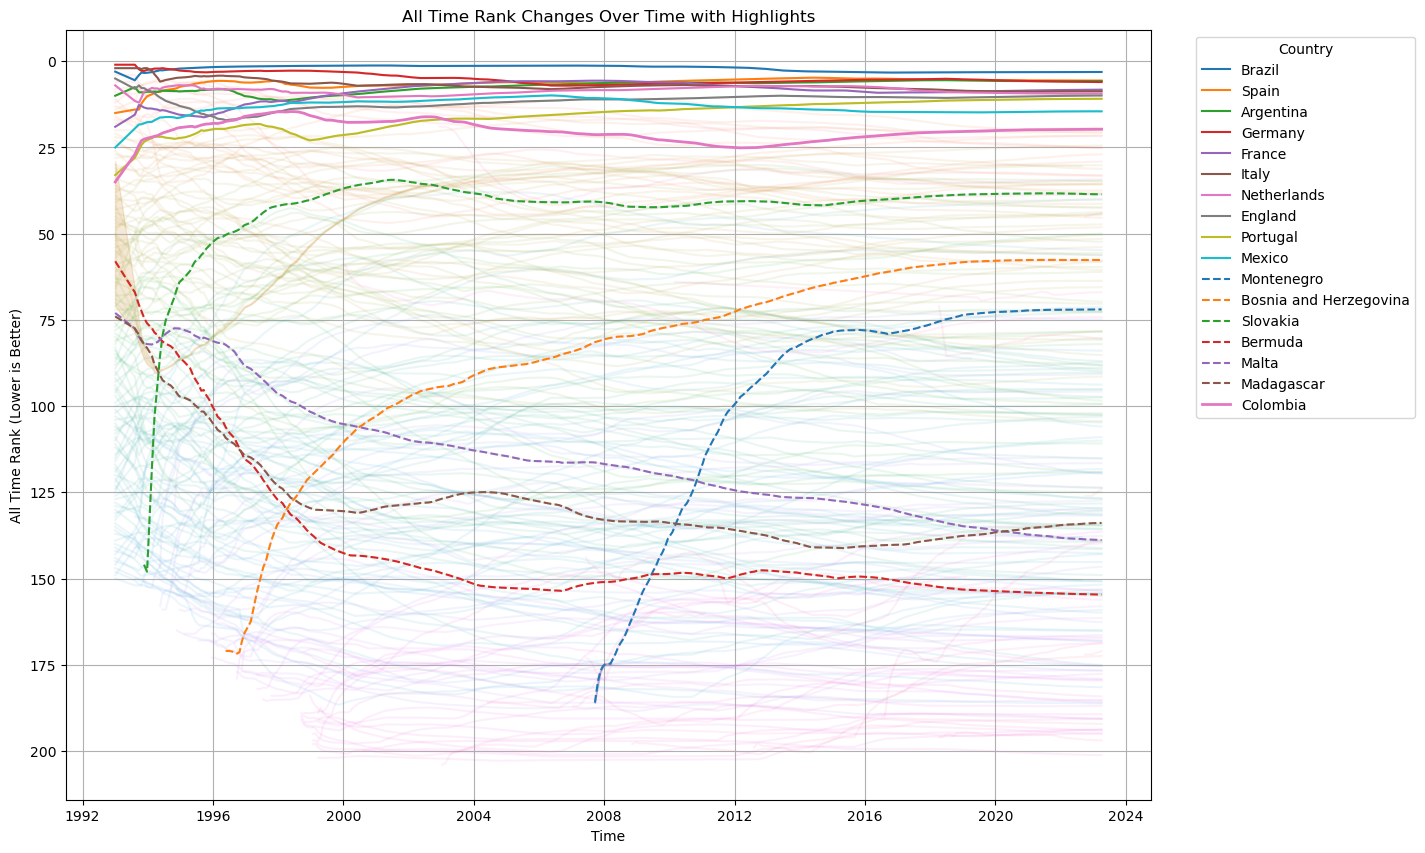

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

data=sorted_data
# Convert date to datetime format for easier manipulation
data['date'] = pd.to_datetime(data['date'])

# Getting the latest date in the dataset for the most recent rankings
latest_date = data['date'].max()

# Filter data for the latest rankings
latest_rankings = data[data['date'] == latest_date]

# Identify the top 10 countries based on the latest rankings
top_ten = latest_rankings.nsmallest(10, 'All Time Rank')['country']

# Determine the biggest movers by comparing their earliest and latest rankings
earliest_latest = data.groupby('country').agg({
    'All Time Rank': ['first', 'last'],
    'date': ['min', 'max']
}).reset_index()

# Calculate changes in rank
earliest_latest['rank_change'] = earliest_latest[('All Time Rank', 'last')] - earliest_latest[('All Time Rank', 'first')]
biggest_movers_up = earliest_latest.nsmallest(3, 'rank_change', keep='all')
biggest_movers_down = earliest_latest.nlargest(3, 'rank_change', keep='all')

# Create the updated plot
plt.figure(figsize=(14, 10))
# Adjust the alpha to make the lines very faint
sns.lineplot(data=data, x='date', y='All Time Rank', hue='country', legend=None, color='lightgrey', alpha=0.1)

# Highlight the top ten countries
for country in top_ten:
    subset = data[data['country'] == country]
    sns.lineplot(data=subset, x='date', y='All Time Rank', label=country)

# Highlight the biggest movers
for country in pd.concat([biggest_movers_up['country'], biggest_movers_down['country']]):
    subset = data[data['country'] == country]
    sns.lineplot(data=subset, x='date', y='All Time Rank', label=country, linestyle='--')

# Specifically mark Colombia and Mexico
for country in ['Colombia']:
    subset = data[data['country'] == country]
    sns.lineplot(data=subset, x='date', y='All Time Rank', label=country, linewidth=2)

# Invert the y-axis and customize the plot
plt.gca().invert_yaxis()
plt.title('All Time Rank Changes Over Time with Highlights')
plt.xlabel('Time')
plt.ylabel('All Time Rank (Lower is Better)')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)

plt.show()


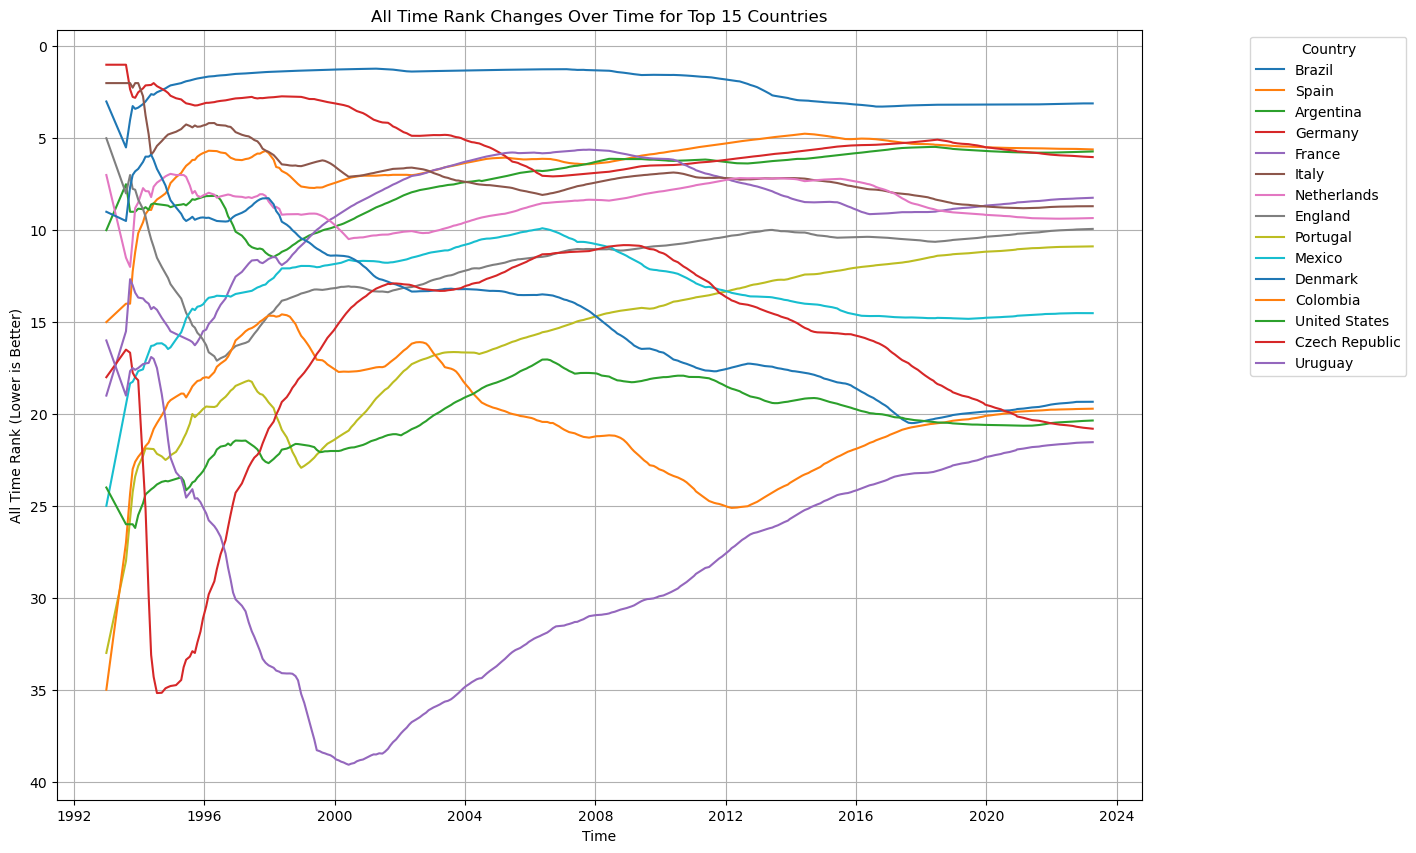

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

data = sorted_data
# Convert date to datetime format for easier manipulation
data['date'] = pd.to_datetime(data['date'])

# Getting the latest date in the dataset for the most recent rankings
latest_date = data['date'].max()

# Filter data for the latest rankings
latest_rankings = data[data['date'] == latest_date]

# Identify the top 15 countries based on the latest rankings
top_fifteen = latest_rankings.nsmallest(15, 'All Time Rank')['country']

# Filter the dataset to include only these top 15 countries
data = data[data['country'].isin(top_fifteen)]

# Create the plot
plt.figure(figsize=(14, 10))
# Plotting only the top 15 countries
for country in top_fifteen:
    subset = data[data['country'] == country]
    sns.lineplot(data=subset, x='date', y='All Time Rank', label=country)

# Invert the y-axis and customize the plot
plt.gca().invert_yaxis()
plt.title('All Time Rank Changes Over Time for Top 15 Countries')
plt.xlabel('Time')
plt.ylabel('All Time Rank (Lower is Better)')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)

plt.show()



In [33]:
import pandas as pd

# Load the datasets
u20_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/U20 WC.csv')
u17_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/U17 WC.csv')

# Count the number of appearances for each country in both datasets
u20_participation = u20_data['Team'].value_counts().rename_axis('Country').reset_index(name='U20 WC Participation')
u17_participation = u17_data['Team'].value_counts().rename_axis('Country').reset_index(name='U17 WC Participation')

# Merge the two dataframes on the country column
combined_participation = pd.merge(u20_participation, u17_participation, on='Country', how='outer').fillna(0)

# Convert float counts to integer
combined_participation['U20 WC Participation'] = combined_participation['U20 WC Participation'].astype(int)
combined_participation['U17 WC Participation'] = combined_participation['U17 WC Participation'].astype(int)

# Clean up column names to remove any extra spaces
combined_participation.columns = combined_participation.columns.str.strip().str.replace('  ', ' ', regex=True)

# Display the dataframe
print(combined_participation.head())
combined_participation.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Partdata.csv", index=False)

         Country  U20 WC Participation  U17 WC Participation
0         Brazil                    18                    19
1  United States                    16                    18
2          Spain                    14                     9
3         Mexico                    13                    14
4        Uruguay                    13                     5


In [34]:
# Load the datasets
agg_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')
part_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Partdata.csv')

# Normalize the country column names for a consistent merge
agg_data['country'] = agg_data['country'].str.strip()
part_data['Country'] = part_data['Country'].str.strip()

# Merge the datasets on the country column
merged_data = pd.merge(agg_data, part_data, left_on='country', right_on='Country', how='left').drop('Country', axis=1)

# Fill missing values with 0 in participation columns
merged_data['U20 WC Participation'] = merged_data['U20 WC Participation'].fillna(0).astype(int)
merged_data['U17 WC Participation'] = merged_data['U17 WC Participation'].fillna(0).astype(int)

# Display the merged dataset
print(merged_data.head())

merged_data.to_csv("C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv", index=False)

   year    country  rank  soccer_dummy  num_coaches  All Time Rank  \
0  2023     Brazil     1             1           36       3.104938   
1  2023      Spain     2             1           95       5.608025   
2  2023  Argentina     3             1           87       5.719136   
3  2023  Argentina     3             1           87       5.719136   
4  2023    Germany     4             1           88       6.024691   

   U20 WC Participation  U17 WC Participation  
0                    18                    19  
1                    14                     9  
2                    13                    14  
3                     2                     0  
4                    13                    12  


In [36]:
players_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/List of all pro soccer players.csv')

# List of ccolumns to calculate averages for
numeric_stats_columns = ['Age','Height', 'Weight', 'AerialAbility', 'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking', 'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing', 'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch', 'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing', 'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions', 'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning', 'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping', 'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina', 'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches', 'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty', 'Pressure', 'Professional', 'Sportsmanship', 'Temperament', 'Controversy']


# Grouping the data by country and calculating the number of players and average of numeric stats
aggregated_data = players_data.groupby('Country').agg(
    Number_of_Players=('Country', 'size'),
    **{f'Average_{col}': (col, 'mean') for col in numeric_stats_columns}
).reset_index()

aggregated_data.to_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Aggregated_Player_Stats_by_Country.csv', index=False)

In [38]:
# Load the previously saved aggregated player stats by country
aggregated_player_stats = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Aggregated_Player_Stats_by_Country.csv')

# Load the previously used aggregate data
agg_data_new = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

# Normalize country names and merge the datasets by country
agg_data_new['country'] = agg_data_new['country'].str.strip()
aggregated_player_stats['Country'] = aggregated_player_stats['Country'].str.strip()

# Merge the datasets, ensuring all records from agg_data_new are retained
merged_with_players = pd.merge(agg_data_new, aggregated_player_stats, left_on='country', right_on='Country', how='left').drop('Country', axis=1)

# Display the first few rows of the merged dataset
merged_with_players.to_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

In [42]:
# Load the datasets
pop_df = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/pop.csv')
agg_df = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

# Merging the population data into the Agg data dataset
agg_pop_merged = agg_df.merge(pop_df, how='left', left_on='country', right_on='Country Name')

# Drop the extra 'Country Name' column after merge
agg_pop_merged.drop(columns='Country Name', inplace=True)

# Display the first few rows of the merged dataset
print(agg_pop_merged.head())
agg_pop_merged.to_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

   year    country  rank All time  soccer_dummy  num_coaches  All Time Rank  \
0  2023     Brazil              1             1           36       3.104938   
1  2023      Spain              2             1           95       5.608025   
2  2023  Argentina              3             1           87       5.719136   
3  2023    Germany              4             1           88       6.024691   
4  2023     France              5             1           55       8.237654   

   U20 WC Participation  U17 WC Participation  Number_of_Players  Average_Age  \
0                    18                    19               8231    25.197910   
1                    14                     9               6148    24.781880   
2                    15                    14               8596    24.837366   
3                    13                    12               4784    24.240176   
4                     7                     9               5025    23.196816   

   ...  Average_Versatility  Average_A

In [48]:
# Load both datasets
agg_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')
gdp_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/GDP.csv')

# Renaming the 'Country' column in GDP data to 'country' for uniformity
gdp_data.rename(columns={'Country': 'country'}, inplace=True)

# Correcting the country names in the GDP dataset to match the Agg data
country_name_corrections = {
    "Congo, Dem. Rep.": "DR Congo",
    "Cote d'Ivoire": "Ivory Coast",
    "Russian Federation": "Russia",
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Venezuela, RB": "Venezuela",
    "Egypt, Arab Rep.": "Egypt"
}

# Apply corrections
gdp_data['country'] = gdp_data['country'].replace(country_name_corrections)

# Extracting GDP data for 2017 as the most recent year available (assuming you want 2017; adjust if needed)
gdp_data_2017 = gdp_data[['country', '2017']].rename(columns={'2017': 'GDP_per_capita'})

# Merging the Agg data with 2017 GDP data
merged_data = pd.merge(agg_data, gdp_data_2017, on='country', how='left')

# Display the first few rows of the merged dataset to verify the merge
merged_data.to_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

In [50]:
import pandas as pd
import numpy as np

# Load the dataset of professional soccer players
players_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/List of all pro soccer players.csv')

# Filter players with more than 10 caps
players_with_more_than_10_caps = players_data[players_data['IntCaps'] > 9]

# List of columns to calculate averages for
numeric_stats_columns = ['Age', 'Height', 'Weight', 'AerialAbility', 'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking', 'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing', 'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch', 'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing', 'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions', 'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning', 'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping', 'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina', 'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches', 'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty', 'Pressure', 'Professional', 'Sportsmanship', 'Temperament', 'Controversy']

# Aggregating statistics for players with more than 10 caps
aggregated_data = players_with_more_than_10_caps.groupby('Country').agg(
    Number_of_Players=('Country', 'size'),
    **{f'Average_{col}': (col, 'mean') for col in numeric_stats_columns}
).reset_index()

# Ensuring all countries are represented in the dataset
all_countries = pd.DataFrame(players_data['Country'].unique(), columns=['Country'])
aggregated_data_full = pd.merge(all_countries, aggregated_data, on='Country', how='left').fillna(0)

# Converting all numeric stats to zero if the count of players is zero
numeric_columns = ['Number_of_Players'] + [f'Average_{col}' for col in numeric_stats_columns]
aggregated_data_full[numeric_columns] = aggregated_data_full[numeric_columns].fillna(0)

# Saving the aggregated data to a CSV file
aggregated_data.to_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/10capAggregated_Player_Stats_by_Country.csv', index=False)

In [51]:
# Load the previously saved aggregated player stats by country
aggregated_player_stats = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/10capAggregated_Player_Stats_by_Country.csv')

# Load the previously used aggregate data
agg_data_new = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

# Normalize country names and merge the datasets by country
agg_data_new['country'] = agg_data_new['country'].str.strip()
aggregated_player_stats['Country'] = aggregated_player_stats['Country'].str.strip()

# Merge the datasets, ensuring all records from agg_data_new are retained
merged_with_players = pd.merge(agg_data_new, aggregated_player_stats, left_on='country', right_on='Country', how='left').drop('Country', axis=1)

# Display the first few rows of the merged dataset
merged_with_players.to_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

In [63]:
data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

# Normalize the columns: num_coaches, U20 WC Participation, U17 WC Participation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize the specific columns
normalized_data = scaler.fit_transform(data[['num_coaches', 'U20 WC Participation', 'U17 WC Participation']])
normalized_df = pd.DataFrame(normalized_data, columns=['norm_coaches', 'norm_U20', 'norm_U17'])

# Calculate the weighted average for the Institutional Index
data['Institutional Index'] = 0.3 * normalized_df['norm_coaches'] + 0.35 * normalized_df['norm_U20'] + 0.35 * normalized_df['norm_U17']
data.head(10)


,Unnamed: 0,year,country,rank All time,soccer_dummy,num_coaches,All Time Rank,U20 WC Participation,U17 WC Participation,Population,...,CapAverage_Versatility,CapAverage_Adaptability,CapAverage_Ambition,CapAverage_Loyalty,CapAverage_Pressure,CapAverage_Professional,CapAverage_Sportsmanship,CapAverage_Temperament,CapAverage_Controversy,Institutional Index
0,24,2023,Brazil,1,1,36,3.104938,18,19,215313498,...,11.396825,12.539683,13.349206,12.619048,13.285714,12.968254,11.428571,12.015873,9.603175,0.813684
1,166,2023,Spain,2,1,95,5.608025,14,9,47778340,...,12.097561,13.439024,14.317073,13.902439,14.048780,14.634146,11.268293,11.268293,8.682927,0.738012
2,7,2023,Argentina,3,1,87,5.719136,15,14,46234830,...,12.000000,13.739130,14.239130,13.608696,13.760870,15.086957,13.021739,12.608696,8.673913,0.824298
3,65,2023,Germany,4,1,88,6.024691,13,12,83797985,...,12.473684,10.421053,13.763158,13.236842,13.736842,15.526316,14.131579,13.684211,8.078947,0.751725
4,62,2023,France,5,1,55,8.237654,7,9,67971311,...,9.956522,13.413043,15.043478,12.913043,13.826087,13.760870,13.369565,13.456522,9.478261,0.475585
5,85,2023,Italy,6,1,66,8.697531,7,8,58940425,...,12.254902,11.196078,14.000000,14.705882,13.078431,15.039216,13.862745,12.862745,8.372549,0.491901
6,122,2023,Netherlands,7,1,36,9.342593,4,4,17700982,...,12.026316,14.026316,13.815789,13.236842,13.894737,14.552632,12.500000,12.421053,8.394737,0.265146
7,54,2023,England,8,1,88,9.932099,11,5,56000000,...,11.680000,11.380000,14.120000,13.540000,13.220000,14.500000,12.520000,13.500000,6.520000,0.583889
8,141,2023,Portugal,9,1,46,10.882716,10,3,10409704,...,11.634146,12.804878,13.365854,13.390244,13.097561,14.707317,12.048780,12.097561,8.073171,0.394971
9,112,2023,Mexico,10,1,15,14.515432,14,15,127504125,...,11.044118,13.029412,12.588235,12.794118,12.000000,12.941176,12.264706,12.926471,7.838235,0.595906


In [64]:

# Normalize these new variables
more_normalized_data = scaler.fit_transform(data[['soccer_dummy', 'ln pro per pop']])
more_normalized_df = pd.DataFrame(more_normalized_data, columns=['norm_soccer_dummy', 'norm_pro_per_pop'])

# Prepare a list of all CapAverage columns mentioned, and normalize them
cap_columns = [
    'CapAverage_Communication', 'CapAverage_Eccentricity', 'CapAverage_Bravery', 'CapAverage_Aggression',
    'CapAverage_Composure', 'CapAverage_Concentration', 'CapAverage_Decisions', 'CapAverage_Determination',
    'CapAverage_Flair', 'CapAverage_Leadership', 'CapAverage_Teamwork', 'CapAverage_Workrate',
    'CapAverage_Consistency', 'CapAverage_Dirtiness', 'CapAverage_ImportantMatches', 'CapAverage_Versatility',
    'CapAverage_Adaptability', 'CapAverage_Ambition', 'CapAverage_Loyalty', 'CapAverage_Pressure',
    'CapAverage_Professional', 'CapAverage_Sportsmanship', 'CapAverage_Temperament', 'CapAverage_Controversy'
]

# Normalize CapAverage columns
cap_normalized = scaler.fit_transform(data[cap_columns])
cap_normalized_df = pd.DataFrame(cap_normalized, columns=cap_columns)

# Assign negative weights to specific traits
negative_traits = ['CapAverage_Aggression', 'CapAverage_Dirtiness', 'CapAverage_Temperament', 'CapAverage_Controversy', 'CapAverage_Eccentricity']
for trait in negative_traits:
    cap_normalized_df[trait] *= -1

# Calculate the average of these capabilities, considering the weights
cap_average = cap_normalized_df.mean(axis=1) * 0.015

# Calculate the Cultural Index using the weights given
data['Cultural Index'] = 0.40 * more_normalized_df['norm_soccer_dummy'] + 0.24 * more_normalized_df['norm_pro_per_pop'] + cap_average
data.head(10)

data.to_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

In [3]:
import pandas as pd

agg_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')
# Define the corrected columns of interest with the correct 'CapAverage_' prefix where needed
columns_of_interest = [
    'All Time Rank',
    # Physical Attributes
    'CapAverage_Height', 'CapAverage_Weight',
    # Mental Attributes
    'CapAverage_Aggression', 'CapAverage_Anticipation', 'CapAverage_Bravery', 'CapAverage_Composure', 
    'CapAverage_Concentration', 'CapAverage_Vision', 'CapAverage_Decisions', 'CapAverage_Determination', 
    'CapAverage_Flair', 'CapAverage_Leadership', 'CapAverage_Positioning', 
    'CapAverage_Teamwork', 'CapAverage_Workrate',
    # Other Attributes
    'CapAverage_Consistency', 'CapAverage_Dirtiness', 'CapAverage_ImportantMatches', 'CapAverage_Versatility', 
    'CapAverage_Adaptability', 'CapAverage_Ambition', 'CapAverage_Loyalty', 
    'CapAverage_Pressure', 'CapAverage_Professional', 'CapAverage_Sportsmanship', 'CapAverage_Temperament', 
    'CapAverage_Controversy'
]

# Filter the dataset for the columns of interest, remove 'CapAverage_InjuryProneness' from the list
# since it does not exist in the dataset, and drop any rows with missing data
agg_data_filtered = agg_data[columns_of_interest].dropna()

# Compute the correlation matrix for the filtered data
correlation_matrix = agg_data_filtered.corr()

# Reorder the correlation matrix to have 'All Time Rank' as the first row/column
columns_reordered = ['All Time Rank'] + [col for col in correlation_matrix.columns if col != 'All Time Rank']
correlation_matrix = correlation_matrix[columns_reordered].loc[columns_reordered]

# Output the correlation matrix
correlation_matrix

,All Time Rank,CapAverage_Height,CapAverage_Weight,CapAverage_Aggression,CapAverage_Anticipation,CapAverage_Bravery,CapAverage_Composure,CapAverage_Concentration,CapAverage_Vision,CapAverage_Decisions,...,CapAverage_ImportantMatches,CapAverage_Versatility,CapAverage_Adaptability,CapAverage_Ambition,CapAverage_Loyalty,CapAverage_Pressure,CapAverage_Professional,CapAverage_Sportsmanship,CapAverage_Temperament,CapAverage_Controversy
All Time Rank,1.000000,-0.427301,-0.614767,-0.674938,-0.656357,-0.687648,-0.674490,-0.701196,-0.731231,-0.582473,...,-0.728658,-0.592557,-0.367528,-0.559972,-0.523114,-0.528119,-0.562471,-0.492554,-0.211490,-0.624424
CapAverage_Height,-0.427301,1.000000,0.763764,0.873625,0.913636,0.861312,0.885137,0.879119,0.850971,0.938528,...,0.833544,0.918603,0.941188,0.947618,0.945101,0.962795,0.936455,0.917551,0.906136,0.771345
CapAverage_Weight,-0.614767,0.763764,1.000000,0.863006,0.828482,0.908863,0.865903,0.861671,0.860199,0.777763,...,0.852190,0.834339,0.694235,0.834260,0.784380,0.795295,0.832710,0.770505,0.600562,0.794288
CapAverage_Aggression,-0.674938,0.873625,0.863006,1.000000,0.926140,0.957693,0.938051,0.926941,0.920832,0.881727,...,0.911306,0.933019,0.785754,0.914820,0.887754,0.897084,0.912063,0.858640,0.690554,0.870689
CapAverage_Anticipation,-0.656357,0.913636,0.828482,0.926140,1.000000,0.928693,0.966752,0.948148,0.939620,0.956668,...,0.908372,0.934319,0.836053,0.945086,0.919347,0.940690,0.927059,0.868243,0.790323,0.821451
CapAverage_Bravery,-0.687648,0.861312,0.908863,0.957693,0.928693,1.000000,0.945473,0.958935,0.935916,0.866253,...,0.936285,0.902701,0.791485,0.909267,0.877795,0.888664,0.902296,0.831688,0.680192,0.864539
CapAverage_Composure,-0.674490,0.885137,0.865903,0.938051,0.966752,0.945473,1.000000,0.953064,0.941802,0.929161,...,0.924284,0.930307,0.808977,0.931742,0.904283,0.913096,0.932762,0.856185,0.746369,0.839257
CapAverage_Concentration,-0.701196,0.879119,0.861671,0.926941,0.948148,0.958935,0.953064,1.000000,0.960190,0.908804,...,0.937639,0.910240,0.813204,0.903170,0.887071,0.903719,0.913429,0.837702,0.701368,0.826036
CapAverage_Vision,-0.731231,0.850971,0.860199,0.920832,0.939620,0.935916,0.941802,0.960190,1.000000,0.891155,...,0.925049,0.906874,0.785462,0.884169,0.862244,0.877965,0.882994,0.819906,0.668973,0.831793
CapAverage_Decisions,-0.582473,0.938528,0.777763,0.881727,0.956668,0.866253,0.929161,0.908804,0.891155,1.000000,...,0.853688,0.930890,0.873912,0.941113,0.931094,0.945896,0.932003,0.891291,0.849805,0.759314


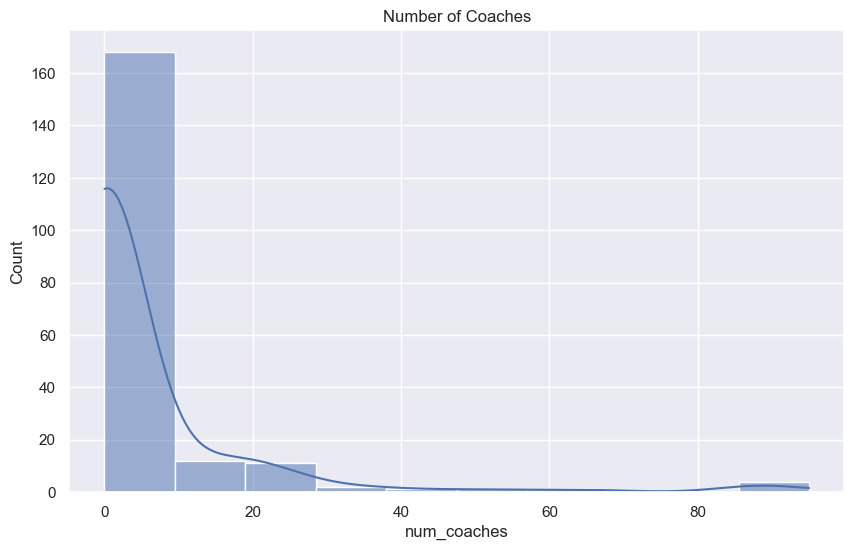

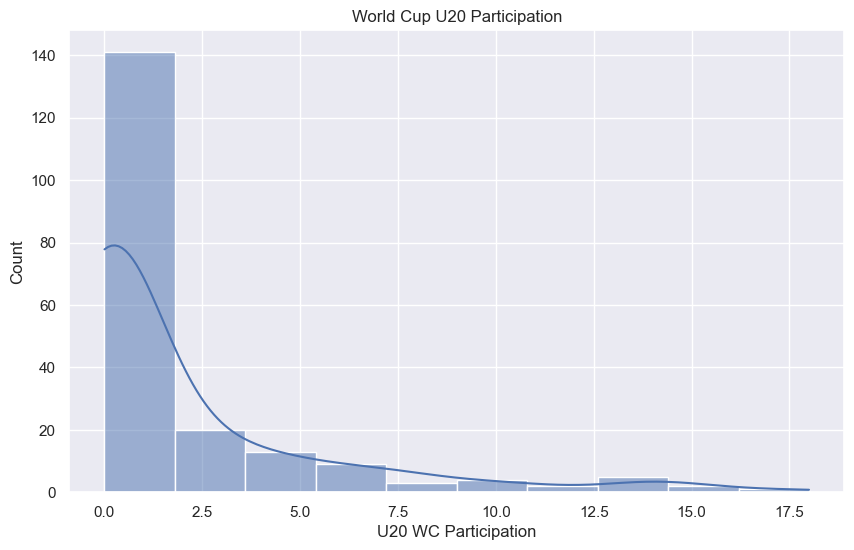

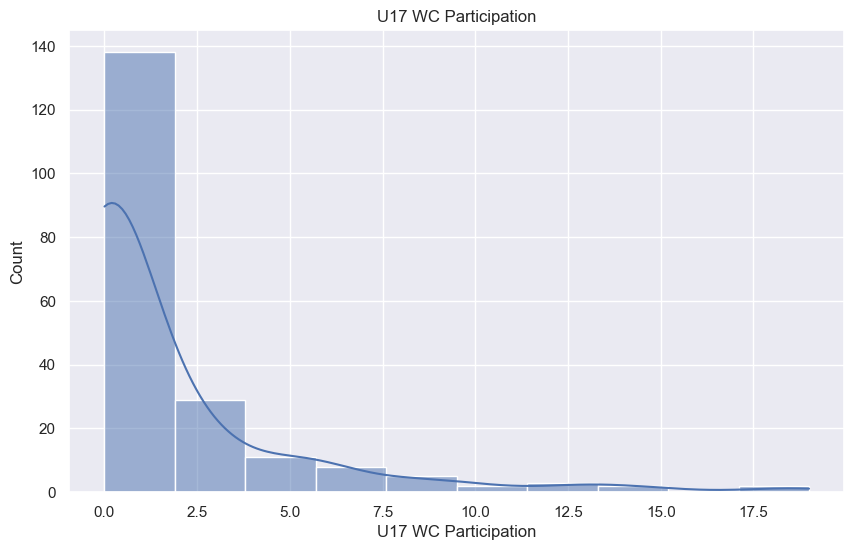

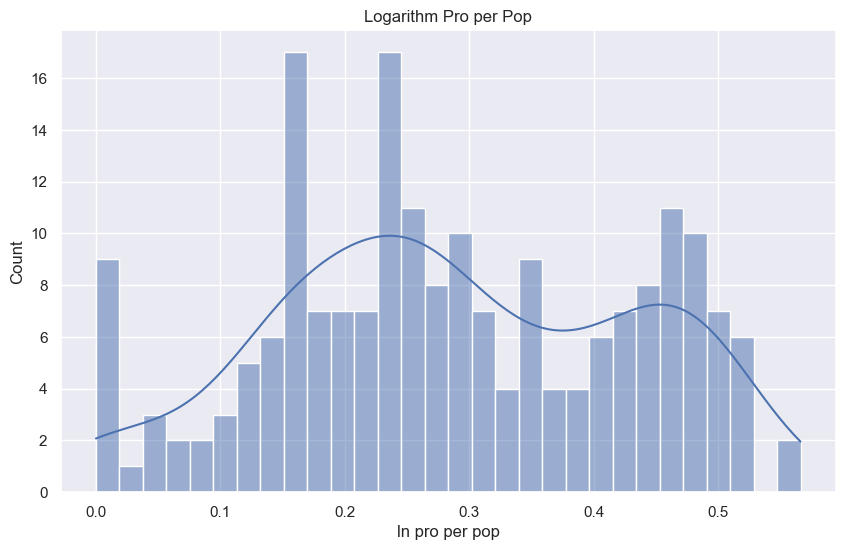

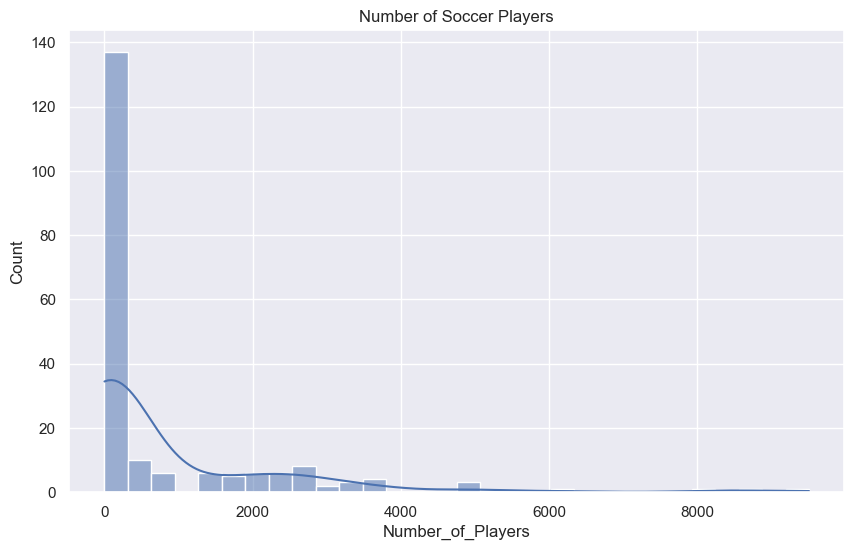

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the column and bin settings for the histograms
histogram_settings = [
    {'column': 'num_coaches', 'bins': 10, 'title': 'Number of Coaches'},
    {'column': 'U20 WC Participation', 'bins': 10, 'title': 'World Cup U20 Participation'},
    {'column': 'U17 WC Participation', 'bins': 10, 'title': 'U17 WC Participation'},
    {'column': 'ln pro per pop', 'bins': 30, 'title': 'Logarithm Pro per Pop'},
    {'column': 'Number_of_Players', 'bins': 30, 'title': 'Number of Soccer Players'}
]

# Loop through the histogram settings and create each histogram with a KDE line
for setting in histogram_settings:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=agg_data, x=setting['column'], bins=setting['bins'], kde=True)
    plt.title(setting['title'] )
    plt.xlabel(setting['column'])
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

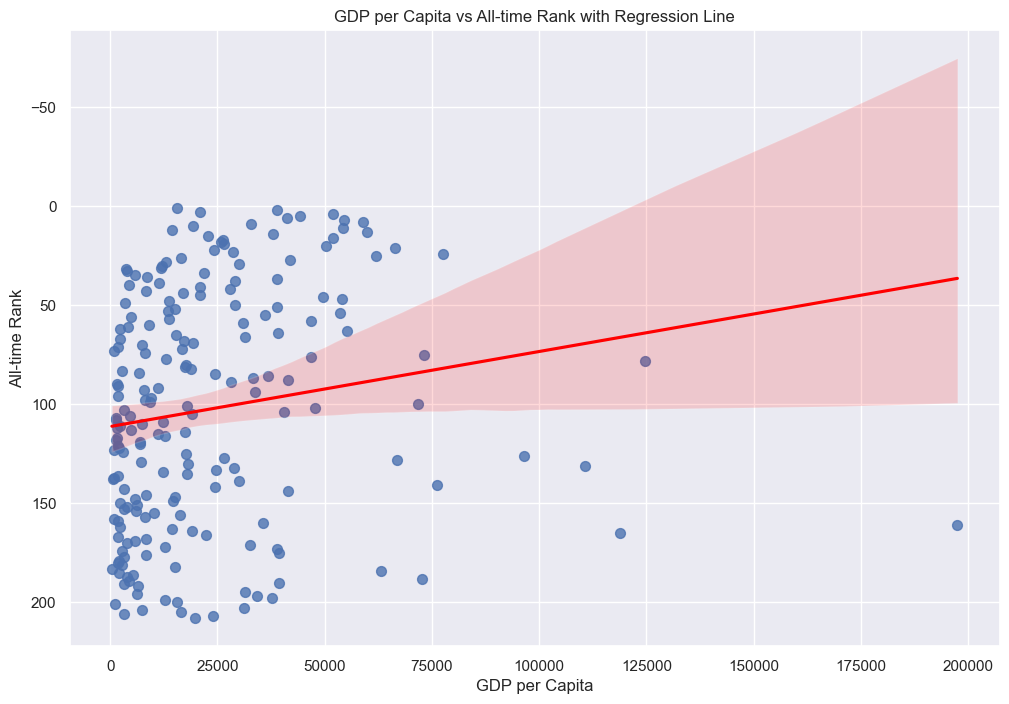

In [13]:
agg_data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/Agg data.csv')

plt.figure(figsize=(12, 8))
sns.regplot(data=agg_data, x='GDP_per_capita', y='rank All time', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Invert y-axis to have the lower ranks at the bottom and higher ranks at the top
plt.gca().invert_yaxis()

plt.title('GDP per Capita vs All-time Rank with Regression Line')
plt.xlabel('GDP per Capita')
plt.ylabel('All-time Rank')
plt.grid(True)
plt.show()

In [4]:
import pandas as pd

data = pd.read_csv('C:/Users/Guill/OneDrive/Documents/School/Masters/Sem 2/ECON 531/results.csv')

# Count total games played by each country (both as home and away)
total_games_home = data['home_team'].value_counts()
total_games_away = data['away_team'].value_counts()
total_games = total_games_home.add(total_games_away, fill_value=0)

# Count wins: home wins and away wins
home_wins = data[data['home_score'] > data['away_score']]['home_team'].value_counts()
away_wins = data[data['away_score'] > data['home_score']]['away_team'].value_counts()
total_wins = home_wins.add(away_wins, fill_value=0)

# Calculate winning percentage
winning_percentage = (total_wins / total_games) * 100

# Create a new DataFrame
country_stats = pd.DataFrame({
    'Country': total_games.index,
    'Games Played': total_games.values,
    'Games Won': total_wins.reindex(total_games.index, fill_value=0).values,  # fill missing wins with 0
    'Winning Percentage': winning_percentage.reindex(total_games.index, fill_value=0).values  # fill missing percentages with 0
})

country_stats.head()


,Country,Games Played,Games Won,Winning Percentage
0,Abkhazia,32.0,14.0,43.750000
1,Afghanistan,135.0,35.0,25.925926
2,Albania,373.0,100.0,26.809651
3,Alderney,135.0,5.0,3.703704
4,Algeria,571.0,257.0,45.008757


Index(['year', 'country', 'rank All time', 'soccer_dummy', 'num_coaches',
       'All Time Rank', 'U20 WC Participation', 'U17 WC Participation',
       'Population', 'GDP_per_capita',
       ...
       'CapAverage_Adaptability', 'CapAverage_Ambition', 'CapAverage_Loyalty',
       'CapAverage_Pressure', 'CapAverage_Professional',
       'CapAverage_Sportsmanship', 'CapAverage_Temperament',
       'CapAverage_Controversy', 'Institutional Index', 'Cultural Index'],
      dtype='object', length=145)
